# Introduction to Python -- Class 2

Previous class:

1. Hello World!
2. Variables and simple data types
3. Readable printing 
4. Loops
5. Boolean logic

This class:

6. Functions
7. If statements
8. Lists


## Functions

There is a large amount of libraries with all kinds of functions. However, sometimes you might need to write a function that does something specific. 

In Python, the structure of a function is the following:
```
    def function_name(argument_1, argument_2):
        local_variable_1 = value_1
        local_variable_2 = value_2
        return expression
```

Be careful with the indentation!

**Documenting your functions is extremely important and a good programming practice.** This is done using what is called a **docstring** inside three double quotes: `"""docstring"""`.

Let us understand all of this with an example. 

**Example.** In the last class, we saw that you can easily calculate how much money you will get out of a bank deposit with a certain initial contribution and after a certain number of years at a fix interest rate:
$$
\text{Final amount} = \text{Initial amount} * \left( 1 + \frac{\text{interest rate}}{100} \right)^{\text{years}}\,.
$$

Can you create a function that calculates the final amount of money in the bank given a certain initial ammount and number of years, at a fixed interest rate of 5%?

In [1]:
def final_amount(initial, years):
    """This function calculates the final amount of money in the bank
    given an `initial` value and a number of `years`, at a fix
    interest rate of 5%.

    Args:
        initial (float): Initial amount of money
        years (int): Number of years in the bank

    Returns:
        float: The final amount of money in the bank
    """
    rate = 5
    return initial * (1 + rate / 100)**years

Let us test our function:

In [2]:
final_amount(100, 7)

140.71004226562505

Now, let us do an exercise. To make sure you are understanding the most important points.

**Exercise.** Write a function that calculates the sum of all integers between 0 and N.

In [3]:
# Solution is hidden:

def sum(N):
    """Sums all integers between 0 and N.

    Args:
        N (int): The limit of the sum

    Returns:
        int: The sum of all integers up to N.
    """
    s = 0
    for i in range(N+1):
        s += i
    return s

Let us test our function:

In [4]:
sum(10)

55

The variables defined inside a function are **local variables**. What does this mean? What will happen if we try to print the value of the variable `s` defined inside the function `s`?

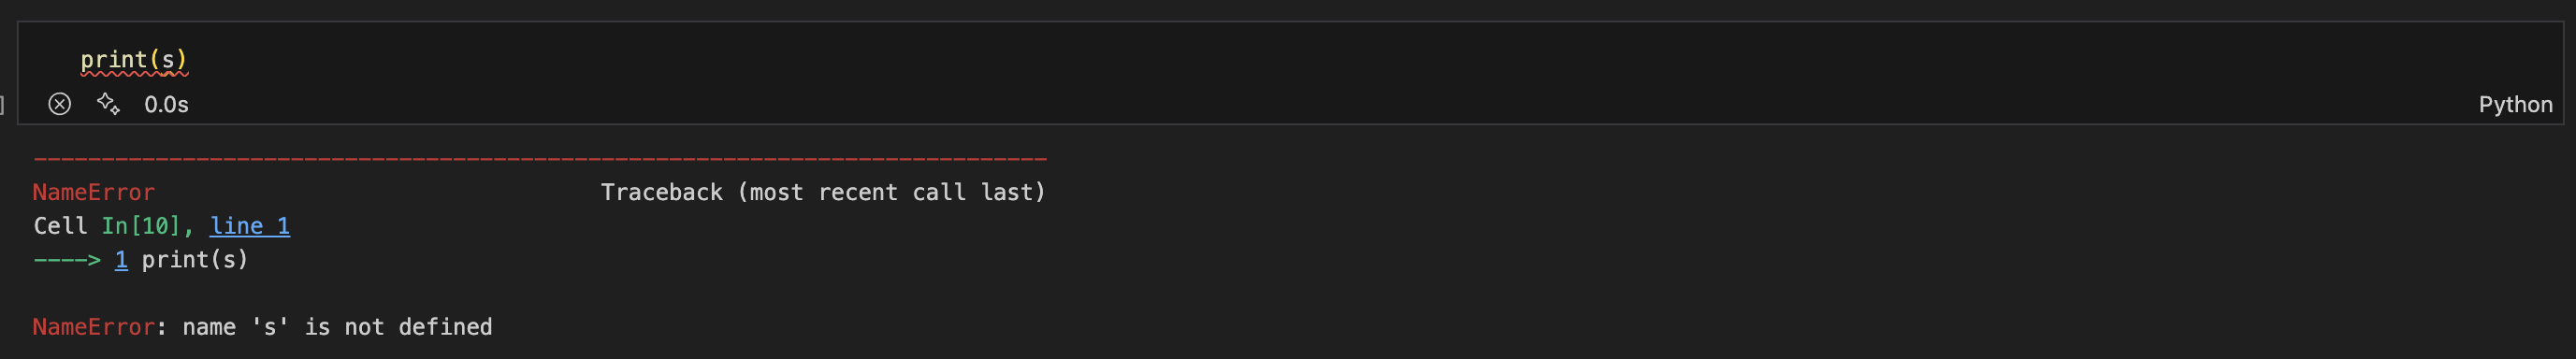

This constrasts with what happens with **global variables**:

In [5]:
s = 1
sum(10)
print(s)

1


The command `return` the output that the function will give. This output is a variable and can be used as such. In the case of our two examples, our functions return only one value, so we can do:

In [6]:
f = final_amount(100,7)  # Calls the function `final_amount`. Assigns the output to the variable f
y = sum(10)  # Calls the function `sum`. Assigns the output value to the variable y
print(f, y)  # Here, it no longer calls the function

140.71004226562505 55


In [7]:
print(final_amount(100, 7), sum(10))  # Here we again call the functions

140.71004226562505 55


A function defined this way is *not* executed until it is called.<br>

For this reason, functions can be very useful for breaking code into smaller chunks. This way we can check each function in our code separately, making sure it runs correctly, before putting it all together. It is good practice, especially when working with IDEs, to define your functions in separate files and then call them when you need them. <br>

If you simply insert values ​​inside the function, then the position of the variables matters (here the the amount and then the years). If you don't remember the order in which the variables are defined inside the function, but you know what they are called, you can do the following:

In [8]:
print(final_amount(100, 7))

print(final_amount(initial=100, years=7))

print(final_amount(years=7,initial=100))

140.71004226562505
140.71004226562505
140.71004226562505


If you document your function properly, like I taught you in the first cell, you will never have this problem of not known the order in which the arguments have been set up.

**Exercise.** Write a function that calculates and return the area and perimeter of a circle of radius $r$. 

Hint. You will need $\pi$ for that. You can import it from Python's `math` librabry as follows:

In [9]:
from math import pi
print(pi)

3.141592653589793


In [10]:
# Answer is hidden

def circle(r):
    """Perimeter and area of the circle.

    Args:
        r (float): The rations of the circle
    
    Returns:
        tuple(float,float): Perimeter and area 
    """
    p = 2*pi*r
    a = pi*r**2
    return p, a

In [11]:
peri, area = circle(1)

In [12]:
print(f"The perimeter is {peri} and the area is {area}.")

The perimeter is 6.283185307179586 and the area is 3.141592653589793.


In [13]:
print(circle(1))

(6.283185307179586, 3.141592653589793)


In [14]:
v = circle(1)
print(v)

(6.283185307179586, 3.141592653589793)


Functions don't necessarily need a return.

In [15]:
def silly(input):
    print(input)

In [16]:
silly("Hello Beutiful World!")

Hello Beutiful World!


In [17]:
silly(10)

10


Now let us learn how to make even more versatile functions.

Do you remember ``range`` from Python functions?
* If we call `range(n)`, it produces a list of numbers from 0 to n-1 with a step of 1.
* If we call `range(a, b)`, it produces a list starting at a and ending at b-1 in increments of 1.
* If, on the other hand, we call `range(a, b, s)`, then it produces a list starting at a and ending at b-1 in increments of s.

So this function has one **mandatory** and two **optional** arguments.<br>

Let's redefine our interest rate function with required and optional arguments.

In [18]:
def final_amount(initial, years, rate=5):
    """This function calculates the final amount of money in the bank
    given an `initial` value and a number of `years`, at an interest
    `rate`.

    Args:
        initial (float): Initial amount of money
        years (int): Number of years in the bank
        rate (int, optional): Interest rate. Defaults to 5.

    Returns:
        float: The final amount of money in the bank
    """
    return initial * (1 + rate / 100)**years

In [19]:
print(final_amount(100, 7))
print(final_amount(100, 7, 6))

140.71004226562505
150.36302589913606


---

## If statements

In many cases, we want to write a single piece of code that does different things in different cases.

In mathematics, for example, we can define piecewise functions. One prototypical example is the famous Heaviside step function:
$$
    f(x)=\begin{cases} 1 & a \leq x\leq b\\
                       0 & \text{otherwise}
        \end{cases}
$$
<br>
Q: How can we program this function?

A: We use `if` statements:

```
if condition:                                      
    <Block to be executed if the condition is true>
                                                   
<Code outside the the if-block is always executed> 
```

Let us use this to write the Heaviside function.

In [20]:
def heaviside1(x,a,b):
    f = 0
    if a <= x <= b:
        f = 1
    return f

In [21]:
print(heaviside1(0,10,20))
print(heaviside1(11, 10, 20))

0
1


An alternative way to write if-blocks is the following.

```
if condition:                                       
    <Block to be executed if the condition is true> 
else:                                               
    <Block to be executed if the condition is false>
                                                    
<Code outside the the if-block is always executed>  
```

Let us write a second Heaviside step function that uses this structure.

In [22]:
def heaviside2(x, a, b):
    if a <= x <= b:
        return 1
    else:
        return 0

print(heaviside2(0, 10, 20))
print(heaviside2(11, 10, 20))

0
1


We can include any number of conditions as long as they are exhaustive and mutually exclusive. Such a code would look like this:

```
if condition1:                                        
    <Block to be executed if condition1 is true>      
elif condition2:                                      
    <Block to be executed if condition2 is true>      
elif condition3:                                      
    <Block to be executed if condition3 is true>      
...                                                   
else:                                                 
    <Block to be executed if all conditions are false>
                                                      
<Code outside the the if-block is always executed>    
```


**Our favorite exercise with more flavours.**

Not all bank deposits have the same interest rate. Suppose a bank gives you:
* a 5% interest rate for any *initial* amount less than or equal to 1000€;
* a 6% interest rate for any *initial* amount greater than 1000€, but less than or equal to 10000€;
* and an 8% interest rate for any *initial* amount greater than 10000€.

Write a function that calculates the final amount of money given these constraints.

In [23]:
# Answer is hidden:

def bank(initial, years):
    if initial <= 1000:
        return initial * (1 + 5 / 100)**years
    elif 1000 < initial <= 10000:
        return initial * (1 + 6 / 100)**years
    else:
        return initial * (1 + 8 / 100)**years

In [24]:
print(bank(1000,7))
print(bank(10000, 7))
print(bank(100000, 7))

1407.1004226562504
15036.302589913606
171382.4268779521


---

## Lists

We have already mentioned lists in one or two moments throughout the classes. 

For example, we mentioned that the method `range` creates a list over which we iterate. 

We will now start to understand this concept a bit better.

The syntax for creating a list variable is as follows<br>
<br>
``lista = [a, b, c, d,... ]`` <br>

Note the square brackets: These tell Python that what is inside these brackets constitutes a list. (Other types of brackets define other variable types, so do not confuse them!)

List elements are separated by commas, and a list can contain variables of all kinds.

In [25]:
my_first_list1 = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
my_first_list2 = [pi, 'Hello World!', 4]  # lists accomodate different data types

print(my_first_list1)
print(my_first_list2)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[3.141592653589793, 'Hello World!', 4]


Python indexes a list of N elements such that the first element has index **0** and the last element has index **N-1**. To retrieve an element from the list we simply write: ``list_name[index]``.

Using a **positive** value for the index, say 3, tells Python to consider the **fourth** element starting from the beginning of the list. <br>

Using a **negative** value, say -3, tells Python to consider the fourth element from the end of the list.

Let us see some examples:

In [26]:
print(my_first_list1[0])  # Prints the first element of the list
print(my_first_list1[2])  # Prints the third element of the list
print(my_first_list1[-10])  # Prints the first element of the list
print(my_first_list1[-1])  # Prints the last element of the list

1
3
1
10


To find out the length of a list you can use the method `len()`:

In [27]:
len(my_first_list1)

10

Python also allows you to create an empty list:

In [28]:
empty = []
len(empty)

0

### Basic operations to add or eliminate elements from a list:

In [29]:
# If we want to add a single element at the end:
my_first_list1.append(11)
print(my_first_list1)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [30]:
# If we want to add more than one element at the end:
my_first_list1 = my_first_list1 + [12, 13] 
print(my_first_list1)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]


In [31]:
# To delete a specific element of a list you can do:
del(my_first_list1[0])  # Deletes the first element of the list
print(my_first_list1)

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]


**Exercise.**<br>

1. Write a for loop for our usual interest rate problem where the result is a list containing the money in our bank account every year. Use an initial amount of 100 Euros, with a rate of 5% for 10 years. (Print only the final list).<br>

2. Write a **function** for the same problem whose result is a list containing the final money. The variables should be the initial amount and the number of years (the interest rate is set at 5%).

In [32]:
# Answer to 1. is hidden:

initial = 100
rate = 5
years = 10
money = []
for i in range(years+1):
    money.append(initial * (1 + rate / 100)**i)
print(money)

[100.0, 105.0, 110.25, 115.76250000000002, 121.55062500000003, 127.62815625000003, 134.00956406250003, 140.71004226562505, 147.7455443789063, 155.13282159785163, 162.8894626777442]


In [33]:
# Answer to 2. is hidden:

def new_bank(initial, years):
    rate = 5
    value = []
    for i in range(years+1):
        value.append(initial * (1 + rate / 100)**i)
    return value

In [34]:
new_bank(100,7)

[100.0,
 105.0,
 110.25,
 115.76250000000002,
 121.55062500000003,
 127.62815625000003,
 134.00956406250003,
 140.71004226562505]

### An important warning about lists!

Python treats lists in a different manner than it treats all other variables we have seen so far. Let us consider the followins example:

In [35]:
a = 3
b = a
print(a)
print(b)

3
3


In [36]:
a = 5
print(a)
print(b)

5
3


Nothing too surprising here. But what happens with lists?

In [37]:
L1 = [1, 2, 3]
L2 = L1
print(L1)
print(L2)

[1, 2, 3]
[1, 2, 3]


In [38]:
L2[-1] = "!"
print(L1)

[1, 2, '!']


Assigning one list to another does not make a copy of the list (as is the case with variables). Instead, what Python does is **link** the two lists, so that any changes you make to one list will affect the other.<br>

To create a copy in the case of lists we have to use the following syntax: ``a_copy_of_list = list.copy()``.

In [39]:
L3 = L1.copy()
print(L1)
print(L3)

[1, 2, '!']
[1, 2, '!']


In [40]:
L1[-1] = 3
print(L1)
print(L2)
print(L3)

[1, 2, 3]
[1, 2, 3]
[1, 2, '!']


### Lists of lists

Lists are very versatile. We can create a list of lists:

In [41]:
nest = [my_first_list1, my_first_list2]
print(nest)


[[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], [3.141592653589793, 'Hello World!', 4]]


Note what happens if we call the first element of this new (nested) list:

In [42]:
nest[0]

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]

If we want the second element of the first list, we can do:

In [43]:
nest[0][1]

3

### List slicing

We've seen how to extract a single element from a list. But what about extracting more than one element? The syntax for this is as follows<br>
<br>
**List[a:b:c]**
<br>
This should look familiar to you: It is exactly the same syntax we used for the range function. And the meaning is exactly the same.

In [44]:
print(my_first_list1)
print(my_first_list1[0:len(my_first_list1):2])

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
[2, 4, 6, 8, 10, 12]


There are other ways of extracting elements from a list. 

We will enumate a few of them here:

In [45]:
print(my_first_list1)
print(my_first_list1[:3])  # Extracts the first three elements of the list
print(my_first_list1[3:])  # Extracts the elements from the 4th to the last
print(my_first_list1[3:-1])  # Extracts the elements from the 4th to the penultimate
print(my_first_list1[:])  # Extracts all elements

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
[2, 3, 4]
[5, 6, 7, 8, 9, 10, 11, 12, 13]
[5, 6, 7, 8, 9, 10, 11, 12]
[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]


---